# Plot The Learning Curve
### Preliminaries

In [2]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

### Load Digits Dataset

In [3]:
# Load data
digits = load_digits()

# Create feature matrix and target vector
X, y = digits.data, digits.target

### Plot Learning Curve

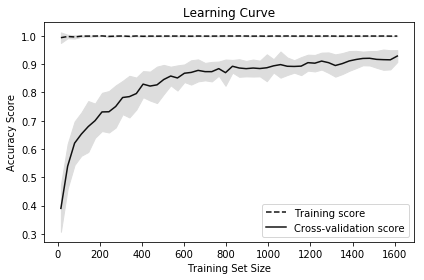

In [7]:
# Create CV training and test score for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                       X, y, cv=10,
                                                       scoring='accuracy',
                                                       n_jobs=-1, 
                                                       train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw Bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Create a plot
plt.title("Learning Curve")
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()